# Task 2: Explorative Datenanalyse

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Hier wollen wir die meistbewertesten Filme anschauen und dazu auch noch nur Filme betrachten, die mehr als 10 Bewertungen aufweisen.

In [9]:
df_movies_ratings = pd.read_csv('ml-25m/df_movies_rating.csv')

In [10]:
# group by title and count ratings
df_movies_sum_ratings = df_movies_ratings.groupby("title")["rating"].count().sort_values(ascending = False).reset_index()

# show movies with more than 10 ratings (only 6.6k movies)
df_movies_10_ratings = df_movies_sum_ratings[df_movies_sum_ratings["rating"] > 10]
df_movies_10_ratings

,title,rating
0,Inception,38895
1,Interstellar,22634
2,Django Unchained,20686
3,The Dark Knight Rises,19911
4,Shutter Island,18886
...,...,...
6473,Radiostars,11
6474,Platinum Data,11
6475,Swallows and Amazons,11
6476,Barbie: Dolphin Magic,11


Nach diesem Schritt blieben leider nur noch 6.6k Filme übrig. Deshalb haben wir unsere Modelle bisher ohne diesen Schritt weiter bearbeitet. 

#### 1. Welches sind die am häufigsten geschauten Genres/Filme?

In [11]:
# separate genres and add them as columns, 0 = not in genre, 1 = in genre
dum = df_movies_ratings['genres'].str.get_dummies(sep = '|')
df_genres = pd.concat([df_movies_ratings, dum], axis=1)
df_genres.head()

,userId,movieId,rating,title,genres,overview,runtime,original_language,spoken_languages,production_companies,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,3,73321,4.0,The Book of Eli,Action|Thriller|Science Fiction,"A post-apocalyptic tale, in which a lone man f...",118,en,English,Alcon Entertainment|Silver Pictures,...,0,0,0,0,0,1,0,1,0,0
1,13,73321,3.5,The Book of Eli,Action|Thriller|Science Fiction,"A post-apocalyptic tale, in which a lone man f...",118,en,English,Alcon Entertainment|Silver Pictures,...,0,0,0,0,0,1,0,1,0,0
2,38,73321,3.0,The Book of Eli,Action|Thriller|Science Fiction,"A post-apocalyptic tale, in which a lone man f...",118,en,English,Alcon Entertainment|Silver Pictures,...,0,0,0,0,0,1,0,1,0,0
3,44,73321,5.0,The Book of Eli,Action|Thriller|Science Fiction,"A post-apocalyptic tale, in which a lone man f...",118,en,English,Alcon Entertainment|Silver Pictures,...,0,0,0,0,0,1,0,1,0,0
4,65,73321,5.0,The Book of Eli,Action|Thriller|Science Fiction,"A post-apocalyptic tale, in which a lone man f...",118,en,English,Alcon Entertainment|Silver Pictures,...,0,0,0,0,0,1,0,1,0,0


Es gibt Filme, die mehrere Genres haben (z.B. wie oben zu sehen, "The Book of Eli") --> Diese 4 Genres werden alle zu dem jeweiligen Genre dazugezählt. Dadurch, haben wir am Schluss viel mehr Genres, als es eigentlich Filme gibt, da die meisten Filme mehr als nur ein Genre haben.

Wir wollen nun herausfinden, welche Genre sehr oft und welche Genre nicht so oft geschaut wurden. Dazu erstellen wir ein Barplot mit den Genres gemessen an der Anzahl an Bewertungen, die sie haben.

C:\Users\Alex\AppData\Local\Temp/ipykernel_23988/2277631516.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([float(x/1000000) for x in ax.get_yticks()])


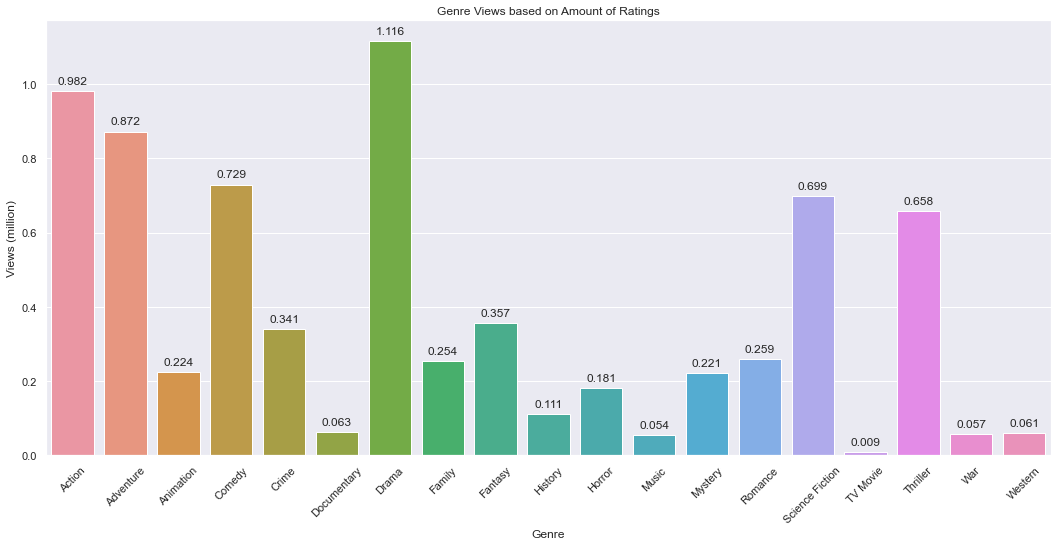

In [12]:
sns.set(rc={'figure.figsize':(18,8)})

# create barplot with the amount of genre occurences
ax = sns.barplot(data = df_genres.iloc[:,-19:].sum().reset_index(), x = "index", y = 0)

# remove "1e6" from plot
ax.ticklabel_format(style='plain', axis='y')

# devide y axis by 1 million (easier to read on the graph)
ax.set_yticklabels([float(x/1000000) for x in ax.get_yticks()])

# add text in millions, rounded by 3 decimals to bars
for p in ax.patches:
    ax.annotate(format(p.get_height()/1000000, '.3f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
            ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

ax.set(xlabel='Genre', ylabel='Views (million)', title="Genre Views based on Amount of Ratings")
plt.xticks(rotation = 45)
plt.show()

Man erkennt, dass das Genre Drama mit Abstand am häufigsten vertreten ist. Es folgen Action, Adventure und Comedy. Die restlichen Genres sind deutlich seltener vertreten.
Am seltensten kommen die Genres TV Movie und Music sowie Dokumentationen vor.

Nun nimmt uns wunder, welche Filme am häufigsten bewertet wurden. 

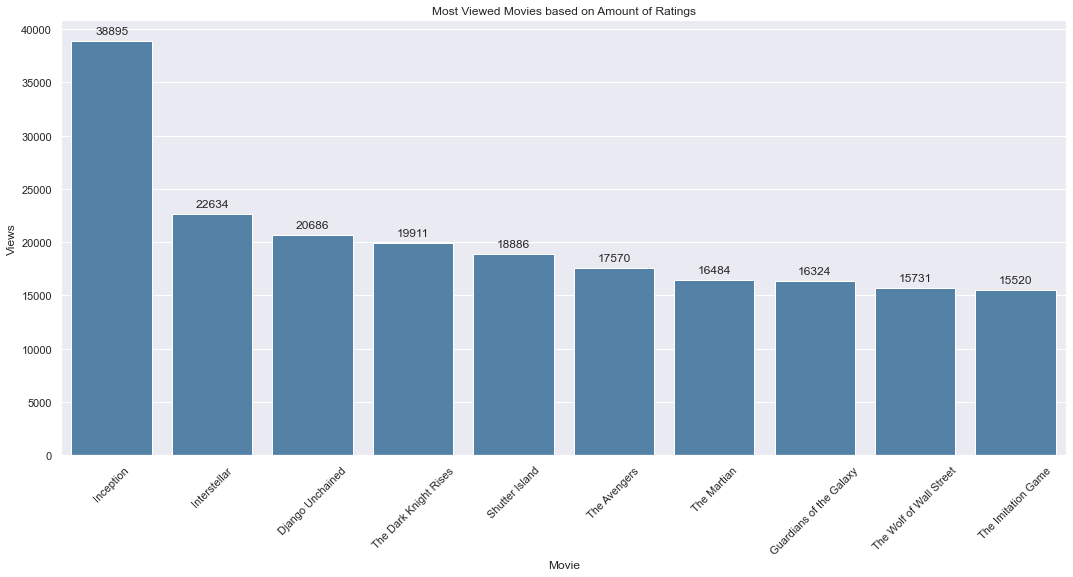

In [13]:
# create barplot with the most viewed movies and add text to bars
ax = sns.barplot(data = df_movies_sum_ratings.iloc[:10,:], x = "title", y = "rating", color = "steelblue")

# add text to bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
            ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

ax.set(xlabel = 'Movie', ylabel = 'Views', title = "Most Viewed Movies based on Amount of Ratings")
plt.xticks(rotation = 45)
plt.show()

Inception ist der Film, welcher mit Abstand am meisten Ratings hat. Danach folgen Interstellar, Django Unchained und The Dark Knight Rises. Es ist überraschend auffällig, dass unter diesen Filmen 3x die Regie von Chrisopher Nolan geführt wurde. Alle diese Filme, welche am meisten bewertet wurden, gehören dem Genre Drama und Action an. Somit schliessen wir daraus, dass dies sehr beliebte Genres sind. Anhand von unserem Plot oben ("genre views based on amount of ratings"), können wir das sogar bestätigen. 

### 2. Wie verteilt sich die Anzahl ratings pro User?  

Als nächstes wollen wir herausfinden, wieviele Filme ein User ungefähr bewertet. Somit können wir sehen, ob ein User im Durchschnitt eher viele oder eher weniger Filme bewertet. 

c:\Users\Alex\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


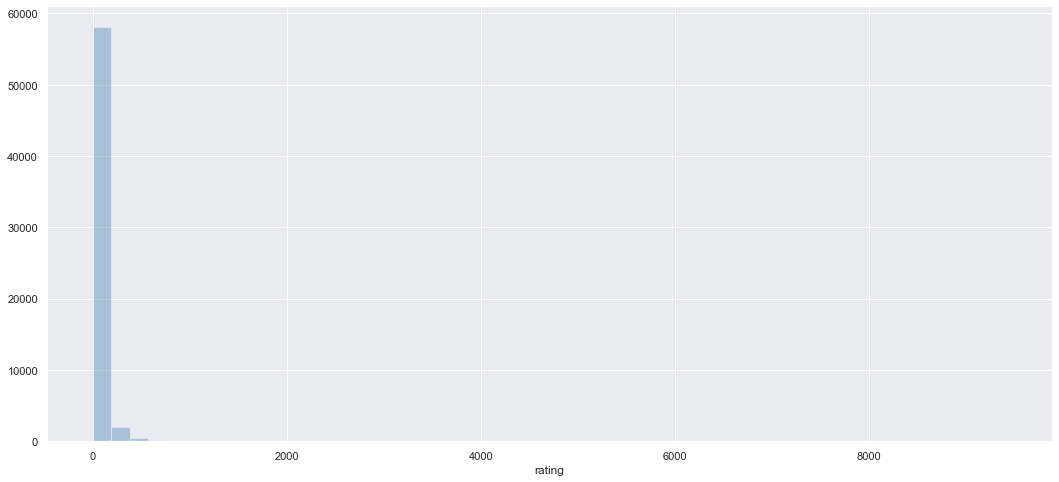

In [14]:
# plot the distribution of ratings per user x amount max 1000
ax = sns.distplot(df_movies_ratings.groupby("userId")["rating"].count(), bins = 50, kde = False, color = "steelblue")


Auf dem Plot kann man kaum etwas erkennen, da es zwar einen User gibt, der fast 8'000 Filme bewertet hat. Allerdings sieht man, dass die meisten User zwischen 0 und 200 Filme bewerteten. aus diesem Grund, machen wir den gleichen Plot nochmals, ändern aber die X-Achse so, dass wir nur bis zu 200 Ratings pro User ansehen. 

(1.0, 250.0)

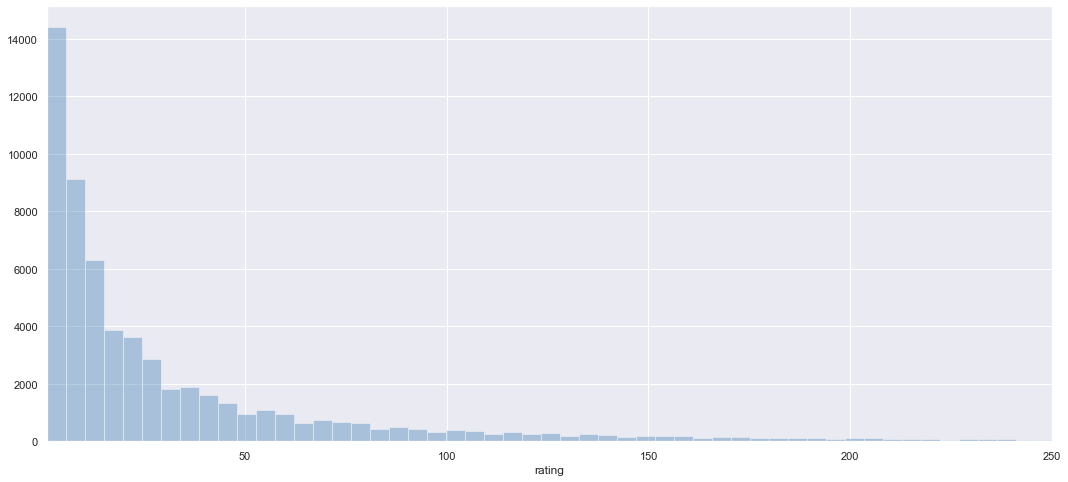

In [15]:
# plot the distribution of ratings per user x amount max 1000
ax = sns.distplot(df_movies_ratings.groupby("userId")["rating"].count(), bins = 2000, kde = False, color = "steelblue")
ax.set_xlim(1, 250)

Nun sieht man schon viel besser, wie sich die Anzahl Ratings verteilt. Die aller meisten User haben "nur" zwischen 1 und 20 Filmen bewertet. Bei über 200 Bewertungen, sind es nur noch sehr weniger User. 

Uns nimmt wunder, wieviele Ratings der User mit den meisten Bewertungen abgegeben hat. 

In [16]:
# max rating count per user
df_movies_ratings.groupby("userId")["rating"].count().max()

9417

Der User mit den Aktuell meisten Ratings hat 9417 Bewertungen abgegeben. Dies ist aber ein ganz klarer Ausreiser. Ob der User wirklich diese 9417 Filme gesehen hat ist stark zu bezweifeln.

#### 3. Wie verteilen sich die Kundenratings gesamthaft und nach Genres?
Hier erstellen wir ein Dataframe mit den Ratings und Genre pro Film, um diese nacher einfacher zu plotten

In [17]:
lst2 = []

# loop through all genres (last 19 columns)
for i in df_genres.iloc[:,-19:].columns:
    # if rating is 1, add genre to list
    lst2.append([i, df_genres[df_genres[i] == 1]["rating"].tolist()])

# create dataframe from lst2 and unpack the list of ratings
df_genres_ratings = pd.DataFrame(lst2, columns = ["Genre", "Rating"])

# explode the list of ratings --> each rating will turn into a row with its corresponding genre
df_genres_ratings = df_genres_ratings.explode("Rating")
df_genres_ratings

,Genre,Rating
0,Action,4.0
0,Action,3.5
0,Action,3.0
0,Action,5.0
0,Action,5.0
...,...,...
18,Western,2.5
18,Western,0.5
18,Western,0.5
18,Western,1.0


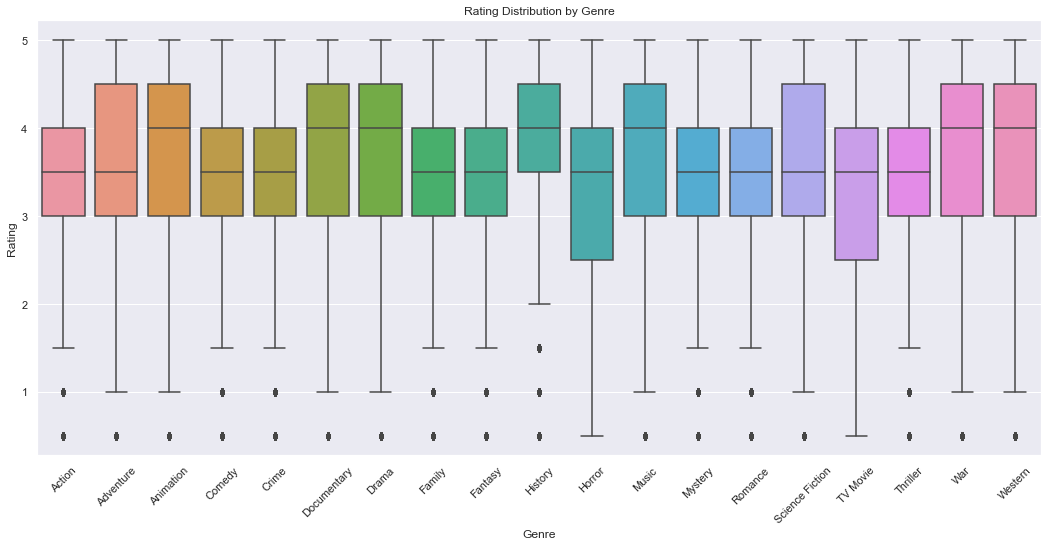

In [18]:
# plot rating by genre

ax = sns.boxplot(data = df_genres_ratings, x = "Genre", y = "Rating")
ax.set(xlabel = "Genre", ylabel = "Rating", title = "Rating Distribution by Genre")
plt.xticks(rotation = 45)
plt.show()

Wir erkennen, dass das Genre History die besten Bewertungen erhalten hat. Die Genres Horror und TV Movie haben mit die schlechtesten Bewertungen erhalten.

#### 4. Wie verteilen sich die mittleren Kundenratings pro Film?
Wir wollen alle Filme gruppieren und die Durchschnittsbewertung pro User plotten. 

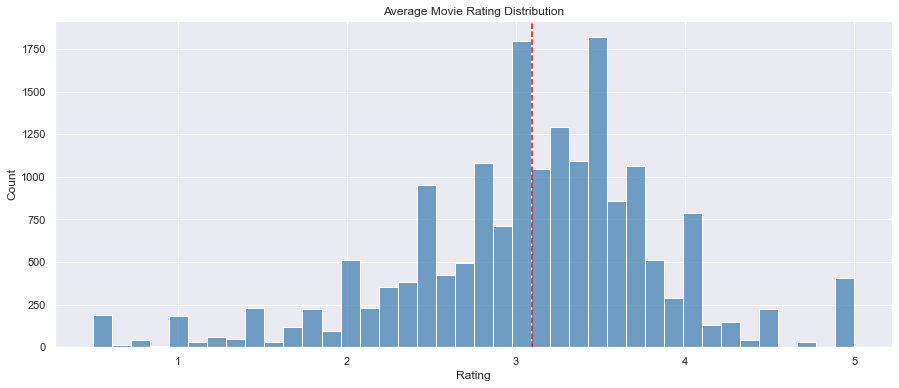

In [22]:
# group title and calculate average rating
df_movies_avg_ratings = df_movies_ratings.groupby("title")["rating"].mean().reset_index()

# create histogram with average ratings
ax = sns.histplot(data = df_movies_avg_ratings, x = "rating", bins = 40, color="steelblue")

# add line that represents the mean of the dataset
ax.axvline(df_movies_avg_ratings["rating"].mean(), color = "red", linestyle = "--")

# set labels
ax.set(xlabel = "Rating", ylabel = "Count", title = "Average Movie Rating Distribution")

plt.show()

Hier sehen wir, dass die meisten Filme durchschnittlich zwischen 3 & 3.5 bewertet wurden und dass die Verteilung aller Bewertungen ungefähr normalverteilt ist. Auffällig sind auch die Balken ganz links und ganz rechts. Dies erklären wir uns dadurch, dass es viele User gibt, die einen Film entweder extrem gerne haben und eine 5 geben oder die einen Film garnicht mochten und die tiefste Bewertung gaben.

#### 5. Wie stark streuen die Ratings von individuellen Kunden?

Als Stichprobe nehmen wir 3 User (user13, user44, user101) und schauen, wie sich deren Ratings verteilen.

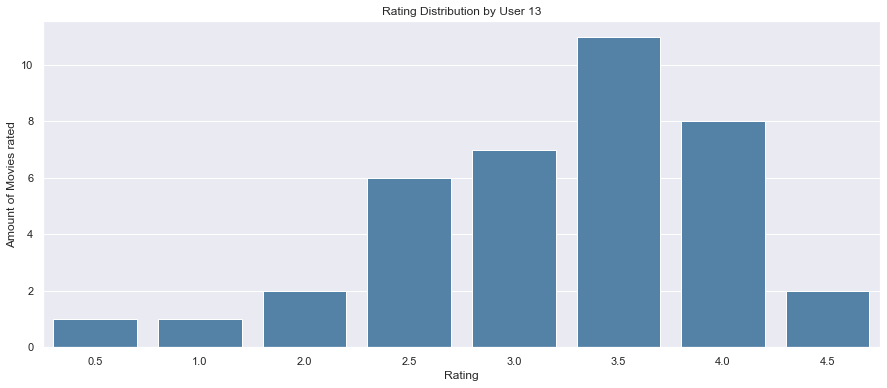

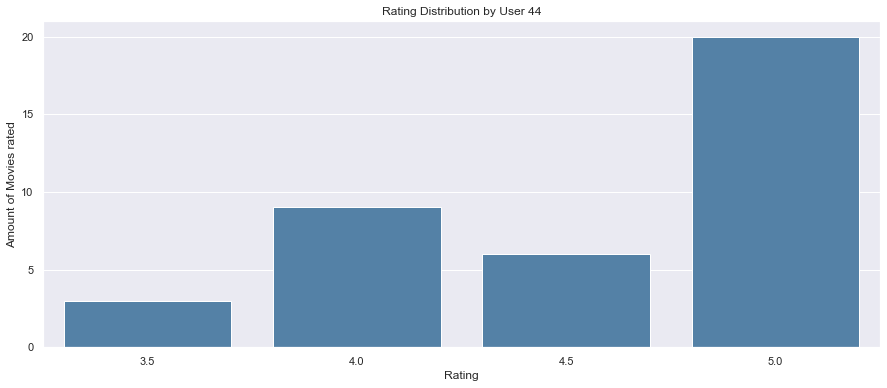

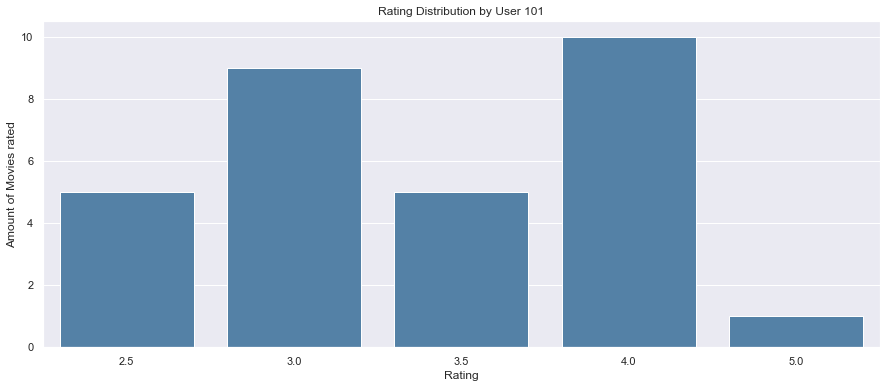

In [20]:
def user_rating(id):
    sns.set(rc={'figure.figsize':(15,6)})

    # create barplot with ratings from user
    ax = sns.barplot(data = df_genres[df_genres["userId"] == id].groupby("rating")["title"].count().reset_index(), x = "rating", y = "title", color = "steelblue")

    # change y axis to integer (example: because its not possible to rate 12.5 movies)
    plt.locator_params(axis='y', integer = True)

    # set labels
    ax.set(xlabel='Rating', ylabel='Amount of Movies rated', title="Rating Distribution by User {}".format(id))
    
    plt.show()

user_rating(13)
user_rating(44)
user_rating(101)

Beim User13 ist die Verteilung ähnlich wie beim Plot mit den Ratings für alle User. Beim User44 fällt auf, dass er wahrscheinlich nur die Filme geratet hat, die er mochte, da alle seine ratings 3.5 und höher sind. Wir gehen davon aus, dass er Filme, die er nicht mochte, garnicht erst bewertet hat. Beim User 101 ist die Bewertung wieder ungefähr normalverteilt mit Peak bei 3.0 und 4.0. 

### 6. Welchen Einfluss hat die Normierung der Ratings pro Kunde auf deren Verteilung?
Normierung (auch Normalisierung): die Skalierung eines Wertes auf einen bestimmten Wertebereich, üblicherweise zwischen 0 und 1 (bzw. 0 und 100 %)

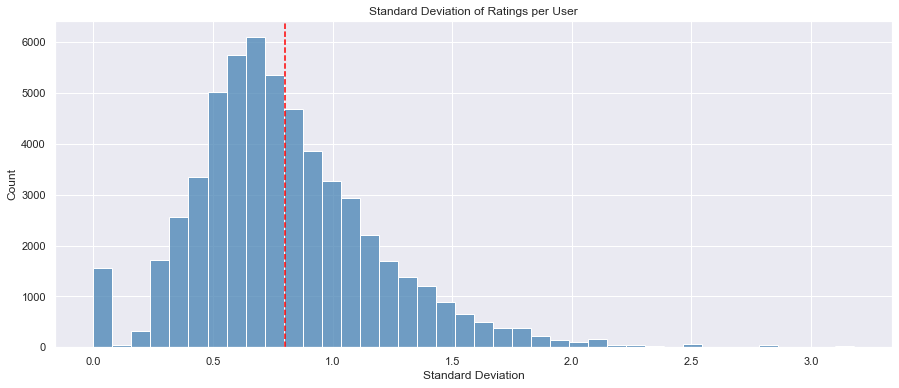

In [21]:
# group by user and calculate standard deviation of their ratings
ax = sns.histplot(data = df_movies_ratings.groupby("userId")["rating"].std().reset_index(), x = "rating", color = "steelblue", bins = 40)

# add line that represents the mean of the dataset
ax.axvline(df_movies_ratings.groupby("userId")["rating"].std().mean(), color = "red", linestyle = "--")

ax.set(xlabel = "Standard Deviation", ylabel = "Count", title = "Standard Deviation of Ratings per User")
plt.show()